In [8]:
%matplotlib notebook

# Generators

We have seen how useful **generator** are as **iterables** that are premade of list comprehensions. 

How can we make our own generators? 

Generators are just functions that encapsulate **state** and return a series of values
Rather than use a **return** it uses **yeild** to return the next item in the list


They are generally used because they are **lazy** and only compute what is needed when its needed. This makes it more efficent on memory and system resources. Lets take a look at an example that can crash a computer due to memory

In [4]:
with open('some_csv.txt','w') as csvFile:
    for i in range(1,100_000_000):
        row = str(list(range(0,50))).replace('[','').replace(']','')+'\n'
        csvFile.write(row)


KeyboardInterrupt: 

The Cell above will make a massive file. So big that i stoped making it early and many computers cant hold it all in memory
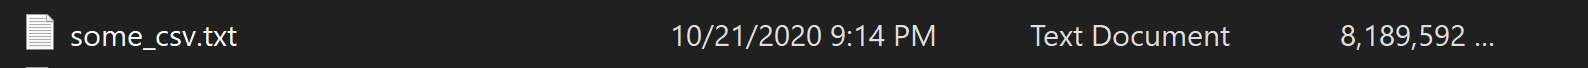

the cell bellow will openthat file, read the hold thing in and then return it as a list of lines of text.

In [5]:
def csv_reader(file_name):
    file = open(file_name)
    result = file.read().split("\n")
    return result

csv_list = csv_reader("some_csv.txt")
row_count = len(csv_list)

print(f"Row count is {row_count}")

Row count is 44137589


It maxes out my memory 
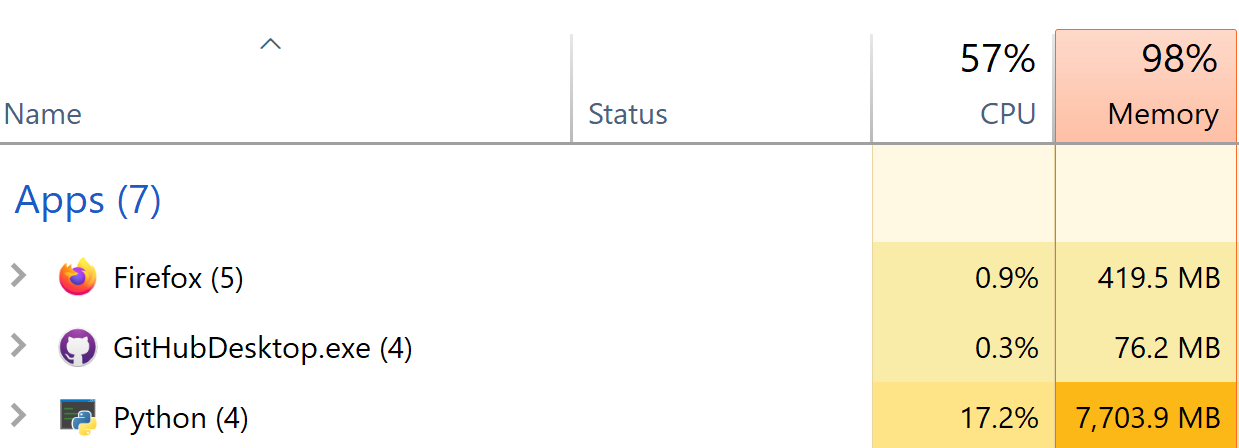

Its so much memory that we need to delete the data structure before we can move on

In [8]:
del csv_list

NameError: name 'csv_list' is not defined

In [7]:
def csv_reader(file_name):
    for row in open(file_name, "r"):
        yield row
        
        
csv_gen = csv_reader("some_csv.txt")
row_count = 0

for row in csv_gen:
    row_count += 1

print(f"Row count is {row_count}")

Row count is 44137588


By comparison, the Code above uses a generator and reads the program one line at a time. Then that line is processes and added to the count. Its much more memory efficient. 
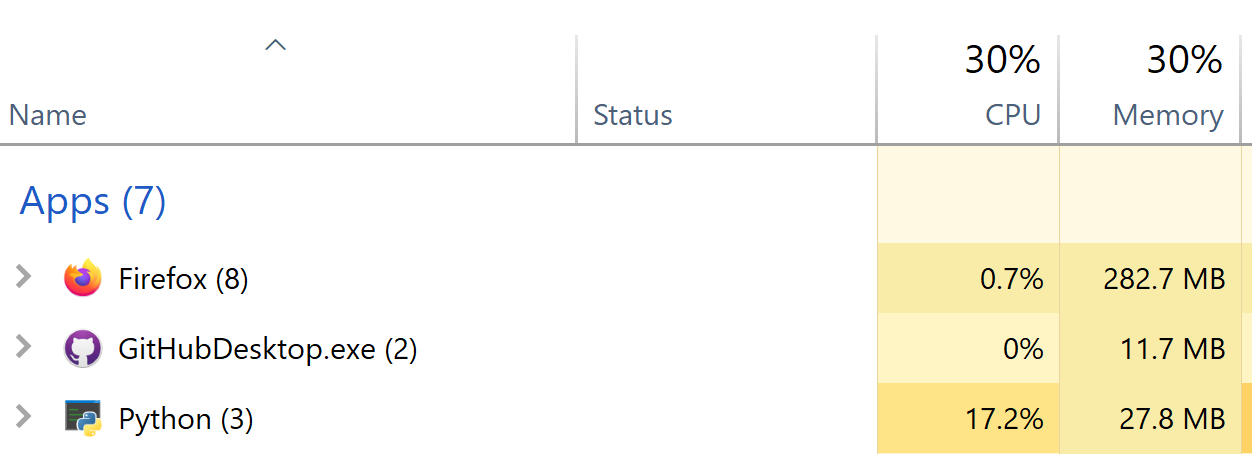

so what are generator grat for? They are great at handling large amounts of data and taking something that is done all at one and turning it into a stream of information. So...

**Generators** are Great for Infinite Series

$S_k = \sum_{n=0}^{k}a_n = a_0 + a_1 + \cdots + a_k$

$L = \sum_{n=0}^{\infty}a_n \Leftrightarrow L = \lim_{k \rightarrow \infty} S_k$



**What is the most used infinite series in engineering and physics? **

Its not the Riemann Zeta Function, but lets look at it. 

$\zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s} = \frac{1}{1^s} + \frac{1}{2^s} + \frac{1}{3^s} + \cdots$

In [12]:
def Zeta_part(s,p=True):
    n = 1
    while True:
        val = 1/(n**s)
        if p == True:
            print(f"Zeta({s})_{n} = {val}")
        yield val
        n+=1


The code above calculates $n^{-S}$, optionally prints it, and then increments n Once you set S it just keeps going. If we were to just take this code and run it as a sum, it would run forever!

Instead we put the **yield** statement in there and the code pauses at that line and will wait untill **next()** is called

In [2]:
next(Zeta_part(1))
next(Zeta_part(1))
next(Zeta_part(1))
next(Zeta_part(1))

Zeta(1)_1 = 1.0
Zeta(1)_1 = 1.0
Zeta(1)_1 = 1.0
Zeta(1)_1 = 1.0


1.0

Why did this not work?

Because we kept remakeing the generator. The solution is to name the generator we make, similar to how we do list comprehensions.

In [3]:
Zeta_1_n = Zeta_part(1)
next(Zeta_1_n)

Zeta(1)_1 = 1.0


1.0

In [4]:
next(Zeta_1_n)
next(Zeta_1_n)
next(Zeta_1_n)
next(Zeta_1_n)

Zeta(1)_2 = 0.5
Zeta(1)_3 = 0.3333333333333333
Zeta(1)_4 = 0.25
Zeta(1)_5 = 0.2


0.2

So now that we have the parts, How do we take calculate the whole $\zeta$ function? 

Well this would take an infinite amount of time to do this way, but we can take it for up to a certain number of $\zeta(s)_n$ 
such that $\zeta(s)~=\sum_{n=1}^{k}\zeta(s)_n$

Here we use the **islice** function from itertools. islice is similar to slicing on a tuple or list. It gets you a part of the infinite series.

In [33]:
import math
import itertools

Zeta_2_n = Zeta_part(2,False)
N = 500

Z_n = itertools.islice(Zeta_2_n,N)
Zeta_2 = sum(Z_n)

diff =  (math.pi**2)/6-Zeta_2
print(f"Zeta_2 from n=1 to n={N} is approximately\n {Zeta_2},\nand is off by\n {diff}\nfrom the true value")#.format(N,Zeta_2,diff))


Zeta_2 from n=1 to n=500 is approximately
 1.642936065514894,
and is off by
 0.0019980013333324997
from the true value


What if that isnt good enough and we want to keep going? Well we can use islice to get more terms

In [43]:
Z_n = itertools.islice(Zeta_2_n,0,10000)# lets grap 10000 more terms
Zeta_2 = Zeta_2 + sum(Z_n)## add them to what we have

diff =  (math.pi**2)/6-Zeta_2
print(f"Zeta_2 from n=1 to n={N} is approximately\n {Zeta_2},\nand is off by\n {diff}\nfrom the true value")#.format(N,Zeta_2,diff))


Zeta_2 from n=1 to n=500 is approximately
 1.6449241166489736,
and is off by
 9.950199252761749e-06
from the true value


Keep runing the code block above and watch as it converges to the true value.

So what did the generator do? It made the while loop safe and made it into something like a for loop where you can change the N!

Where else can we see infinite series? Well lets say we arent iterating over N but are getting things in over time

If you are getting a stream of data in from a DAQ you can view it as yeilding information. 

What about in 3D printing? Well we saw it in the design of G-Code and the design of the STL file. In both cases we needed to be able to read something in one at a time, process it and then move on to conserve memory on a machine

What else are generators good for besides **$\infty$**?

# Structure

Something that will come up over and over again when you write code or interact with someone elses code is the need to do things in an order. Here is some example code

In [44]:
x = 0
def first():
    global x
    x = 2
    print(f"First x={x}")
def second():
    global x
    x = 1/x
    print(f"Second x={x}")
def final():
    global x
    x = 0
    print(f"Final x={x}")

In [45]:
first()
second()
final()

First x=2
Second x=0.5
Final x=0


Here it worked. But what happens if we get the order wrong?

In [46]:
first()
final()
second()

First x=2
Final x=0


ZeroDivisionError: division by zero

O no the world exploded! we divided by zero. How can a generator help?

In [47]:
def mysequence():
    first()
    yield
    second()
    yield
    final()
    yield
seq = mysequence()
next(seq)
next(seq)
next(seq)

First x=2
Second x=0.5
Final x=0


now we cant screw up the order later!

Where does this come up? Well it came up in file manipulations already. We needed to open a file. read or write to it and then close it. we cannot be allowed to screw up that order, so we can make a generator which will open a file read from it and then close the file. It will also come up in internet connections, connections to databases, often when you are interacting with the outside world